# 大滞后过程采样控制仿真作业

被控对象传递函数: 

$$
G_s=\frac{K}{T\cdot s +1} e^{-\tau_0 s}
$$

$K=10,T=6,\tau_0=2$。 请在同一个plot 图中绘制采样周期(采样控制间隔)$T_s=1.5，1.8，2.2，2.5$ 四种
情况下的闭环采样控制输出响应曲线。

In [1]:
import control as co;
import matplotlib.pyplot as plt;
K=10;
T=6;
tau0=2;
Ts_list=[1.5,1.8,2.2,2.5];

## 被控对象建模

In [2]:
s=co.tf('s');
#currently no method in python-control lib for delay
#see https://github.com/python-control/python-control/issues/626
delay=co.pade(tau0,4);
delay=co.tf(delay[0],delay[1]);
Gs0=K/(T*s+1);
Gs=Gs0*delay;

## 采样控制

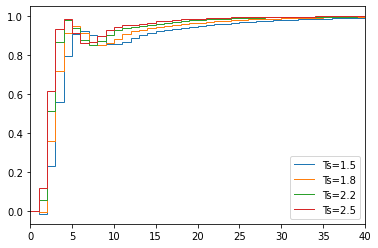

In [3]:

Kp=0.154;
Ki=0.0123;
plt.figure();
for Ts in Ts_list:
    Gz=co.c2d(Gs,Ts);
    Gcs=co.tf([Kp,Ki],[1,0]);
    Gcz=co.c2d(Gcs,Ts);
    Phi=co.feedback(co.series(Gcz,Gz),1);
    T, yout=co.step_response(Phi);
    plt.stairs(yout,label="Ts={:.1f}".format(Ts));
plt.xlim([0,40]);
plt.legend(loc='lower right');